<a href="https://colab.research.google.com/github/dxmai/CS114.L21.KHCL/blob/main/Colab/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Xử lý training dataset

In [147]:
import pandas as pd

dataset = pd.read_csv("https://cs.uit.edu.vn/data2.txt", names = ['size', 'time'])

print(dataset)


          size      time
0      6083695  0.521842
1      1954367  0.152648
2      3734185  0.298548
3      5839301  0.460480
4      6343427  0.527977
...        ...       ...
71110  4472112  0.350379
71111  5471895  0.429955
71112  9837364  0.801394
71113  9466593  0.776407
71114  4080801  0.314468

[71115 rows x 2 columns]


In [148]:
#Tổng số lượng bộ train
dataset.count()

size    71115
time    71115
dtype: int64

Biểu diễn bộ train

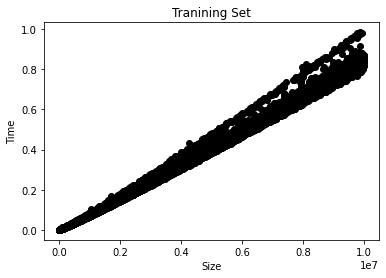

In [149]:
import matplotlib.pyplot as plt

plt.scatter(dataset['size'], dataset['time'], color = 'black')
#plt.plot(x_train, model.predict(x_train), color = 'blue')
plt.title("Tranining Set")
plt.xlabel("Size")
plt.ylabel("Time")
plt.show()

In [150]:
#Code của Thầy An
def InCreaseDimensions(x_value):
  x = x_value
  x = np.hstack((x, np.log2(x_value)))
  x = np.hstack((x, x_value*np.log2(x_value)))
  x = np.hstack((x, x_value*x_value))
  return x

Data Preprocessing

In [151]:
import numpy as np

x_train = dataset.iloc[:, :-1].values  
y_train = dataset.iloc[:,1].values 

print(x_train)

print(y_train)

x_train = InCreaseDimensions(x_train)
print(x_train)

[[6083695]
 [1954367]
 [3734185]
 ...
 [9837364]
 [9466593]
 [4080801]]
[0.521842 0.152648 0.298548 ... 0.801394 0.776407 0.314468]
[[6.08369500e+06 2.25365164e+01 1.37105292e+08 3.70113449e+13]
 [1.95436700e+06 2.08982700e+01 4.08428892e+07 3.81955037e+12]
 [3.73418500e+06 2.18323620e+01 8.15260786e+07 1.39441376e+13]
 ...
 [9.83736400e+06 2.32298404e+01 2.28520395e+08 9.67737305e+13]
 [9.46659300e+06 2.31744139e+01 2.19382744e+08 8.96163830e+13]
 [4.08080100e+06 2.19604209e+01 8.96161077e+07 1.66529368e+13]]


Xử lý testing dataset

In [153]:
test = pd.read_csv("https://cs.uit.edu.vn/data3.txt", names = ['test', 'time'])

x_test = test.iloc[:, :-1].values
y_test = test.iloc[:, 1].values

x_test = InCreaseDimensions(x_test)


Tạo Model

In [154]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Chạy model

In [155]:
#Bộ dữ liệu data2.txt
y_pred_train = model.predict(x_train)
y_pred_train

array([0.49516289, 0.14845277, 0.29519357, ..., 0.8233154 , 0.79054668,
       0.32433003])

In [156]:
#Bộ dữ liệu data3.txt
y_pred = model.predict(x_test) 
y_pred

array([3.40605746, 3.36423167, 3.29011957, ..., 2.99884273, 1.85546386,
       1.8680952 ])

Tạo bảng so sánh giữa giá trị thực tế và giá trị dự đoán với bộ test

In [157]:
#Bộ dữ liệu data3.txt
result_table = {'Predict': y_pred,
                'Real Time': y_test}
result = pd.DataFrame(result_table, columns=['Predict', 'Real Time'])

print(result)


        Predict  Real Time
0      3.406057    4.12166
1      3.364232    3.92089
2      3.290120    3.21540
3      2.626999    2.54506
4      2.288823    2.21831
...         ...        ...
10585  2.376652    2.35117
10586  1.810442    1.79155
10587  2.998843    2.90918
10588  1.855464    1.80292
10589  1.868095    1.82795

[10590 rows x 2 columns]


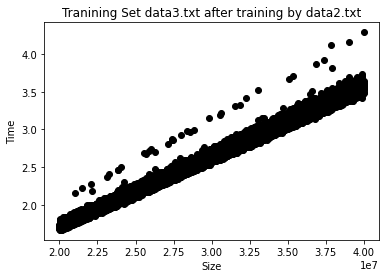

In [162]:
import matplotlib.pyplot as plt

plt.scatter(test['test'], test['time'], color = 'black')
#plt.plot(x_train, model.predict(x_train), color = 'blue')
plt.title("Tranining Set data3.txt after training by data2.txt")
plt.xlabel("Size")
plt.ylabel("Time")
plt.show()

In [163]:
#MSE
import sklearn

print("MSE cua bo test data2.txt sau khi increase dimension")
sklearn.metrics.mean_squared_error(y_train, y_pred_train)

MSE cua bo test data2.txt sau khi increase dimension


0.00012190225045388428

In [164]:
print("MSE cua bo test data3.txt sau khi increase dimension")
sklearn.metrics.mean_squared_error(y_test, y_pred)

MSE cua bo test data3.txt sau khi increase dimension


0.004181175138868819

Tham khảo tại nguồn:

https://www.askpython.com/python/examples/linear-regression-in-python

https://datatofish.com/create-pandas-dataframe/